In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import warnings
import pickle
from sklearn.model_selection import train_test_split

In [3]:
path = r"C:\Users\49171\Desktop\Graph-Database-Learning-Algorithms-Neo4j-\Flu Classification Dataset\Flu Classification.csv"
df = pd.read_csv(path)
df.head(10)

,Diagnosis,InitialPCRDiagnosis,Age,Sex,Region,CommunityTransmission,NumberOfFamilyMembersInfected,neutrophil,neutrophilCategorical,serumLevelsOfWhiteBloodCell,...,Temperature,Hematocrit,ActivatedPartialThromboplastinTime,Fibrinogen,Urea,Fatigue,Monocytes,Basophil,Cancer,Thrombocytes
0,H1N1,NaN,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,38.111111,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
1,H1N1,NaN,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,36.555556,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN
4,H1N1,NaN,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,H1N1,NaN,19.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,H1N1,NaN,60.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,38.166667,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
8,H1N1,NaN,46.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,38.611111,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
9,H1N1,NaN,18.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.fillna(0)
df.head(10)

,Diagnosis,InitialPCRDiagnosis,Age,Sex,Region,CommunityTransmission,NumberOfFamilyMembersInfected,neutrophil,neutrophilCategorical,serumLevelsOfWhiteBloodCell,...,Temperature,Hematocrit,ActivatedPartialThromboplastinTime,Fibrinogen,Urea,Fatigue,Monocytes,Basophil,Cancer,Thrombocytes
0,H1N1,0,67.0,F,0,0,0.0,0.0,0,0.0,...,38.111111,0.0,0.0,0.0,0.0,No,0.0,0.0,0,0.0
1,H1N1,0,29.0,M,0,0,0.0,0.0,0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0
2,H1N1,0,22.0,F,0,0,0.0,0.0,0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0
3,H1N1,0,20.0,F,0,0,0.0,0.0,0,0.0,...,36.555556,0.0,0.0,0.0,0.0,Yes,0.0,0.0,0,0.0
4,H1N1,0,21.0,M,0,0,0.0,0.0,0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0
5,H1N1,0,22.0,F,0,0,0.0,0.0,0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0
6,H1N1,0,19.0,F,0,0,0.0,0.0,0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0
7,H1N1,0,60.0,M,0,0,0.0,0.0,0,0.0,...,38.166667,0.0,0.0,0.0,0.0,No,0.0,0.0,0,0.0
8,H1N1,0,46.0,F,0,0,0.0,0.0,0,0.0,...,38.611111,0.0,0.0,0.0,0.0,No,0.0,0.0,0,0.0
9,H1N1,0,18.0,M,0,0,0.0,0.0,0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0


In [5]:
df = df.iloc[0:1484,[0,2,3,25,31,32,33,34,35,36,41,46,49]]
df.head(10)

,Diagnosis,Age,Sex,RiskFactors,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue,Cancer
0,H1N1,67.0,F,0,0,Yes,Yes,0,No,0,38.111111,No,0
1,H1N1,29.0,M,0,0,0,0,0,0,0,0.000000,0,0
2,H1N1,22.0,F,0,0,0,0,0,0,0,0.000000,0,0
3,H1N1,20.0,F,immuno,0,Yes,Yes,0,No,0,36.555556,Yes,0
4,H1N1,21.0,M,0,0,0,0,0,0,0,0.000000,0,0
5,H1N1,22.0,F,0,0,0,0,0,0,0,0.000000,0,0
6,H1N1,19.0,F,0,0,0,0,0,0,0,0.000000,0,0
7,H1N1,60.0,M,"Renal Disease, athero",0,No,Yes,0,No,0,38.166667,No,0
8,H1N1,46.0,F,0,0,Yes,Yes,0,No,0,38.611111,No,0
9,H1N1,18.0,M,0,0,0,0,0,0,0,0.000000,0,0


In [6]:
df.Diagnosis = df.Diagnosis.astype("category").cat.codes
df.Sex = df.Sex.astype("category").cat.codes
df.RiskFactors = df.RiskFactors.astype("category").cat.codes
df.Diarrhea = df.Diarrhea.astype("category").cat.codes
df.Fever = df.Fever.astype("category").cat.codes
df.Coughing = df.Coughing.astype("category").cat.codes
df.ShortnessOfBreath = df.ShortnessOfBreath.astype("category").cat.codes
df.SoreThroat = df.SoreThroat.astype("category").cat.codes
df.NauseaVomitting = df.NauseaVomitting.astype("category").cat.codes
df.Fatigue = df.Fatigue.astype("category").cat.codes
df.Cancer = df.Cancer.astype("category").cat.codes

In [7]:
df.describe()

,Diagnosis,Age,Sex,RiskFactors,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue,Cancer
count,1484.000000,1484.00000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.722372,26.02149,1.454852,5.291779,0.377358,1.148922,1.084232,0.080863,0.725741,0.353774,16.135040,0.592318,0.001348
std,0.447980,21.59296,0.590995,14.159354,0.619246,0.937741,0.957094,0.367507,0.864906,0.606366,18.831488,0.843184,0.036699
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,23.00000,2.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,42.00000,2.000000,0.000000,1.000000,2.000000,2.000000,0.000000,2.000000,1.000000,37.777778,1.000000,0.000000
max,1.000000,88.00000,2.000000,63.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,42.222222,2.000000,1.000000


In [8]:
df

,Diagnosis,Age,Sex,RiskFactors,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue,Cancer
0,1,67.00,1,0,0,2,2,0,1,0,38.111111,1,0
1,1,29.00,2,0,0,0,0,0,0,0,0.000000,0,0
2,1,22.00,1,0,0,0,0,0,0,0,0.000000,0,0
3,1,20.00,1,54,0,2,2,0,1,0,36.555556,2,0
4,1,21.00,2,0,0,0,0,0,0,0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,0,56.00,1,41,1,2,2,0,0,1,0.000000,0,0
1480,0,1.40,0,0,0,0,0,0,0,0,0.000000,0,0
1481,0,0.83,0,0,0,0,0,0,0,0,0.000000,0,0
1482,0,3.00,0,0,0,0,0,0,0,0,0.000000,0,0


c:\users\49171\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


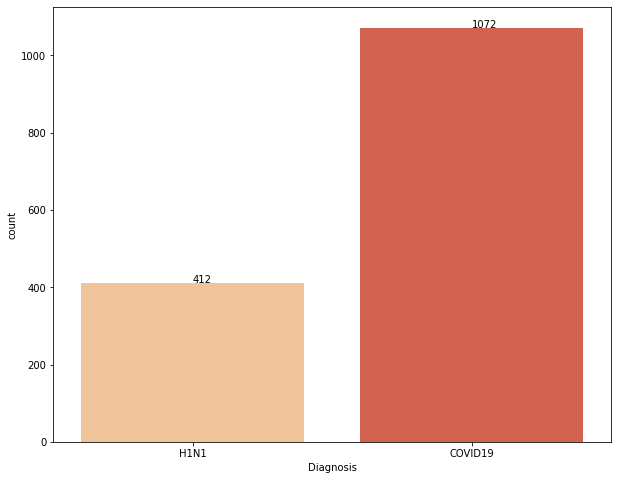

In [9]:
plt.figure(figsize=(10,8))
ax=sns.countplot(df['Diagnosis'], palette='OrRd')
ax.set_xticklabels(['H1N1','COVID19'])
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.40, p.get_height()+1))

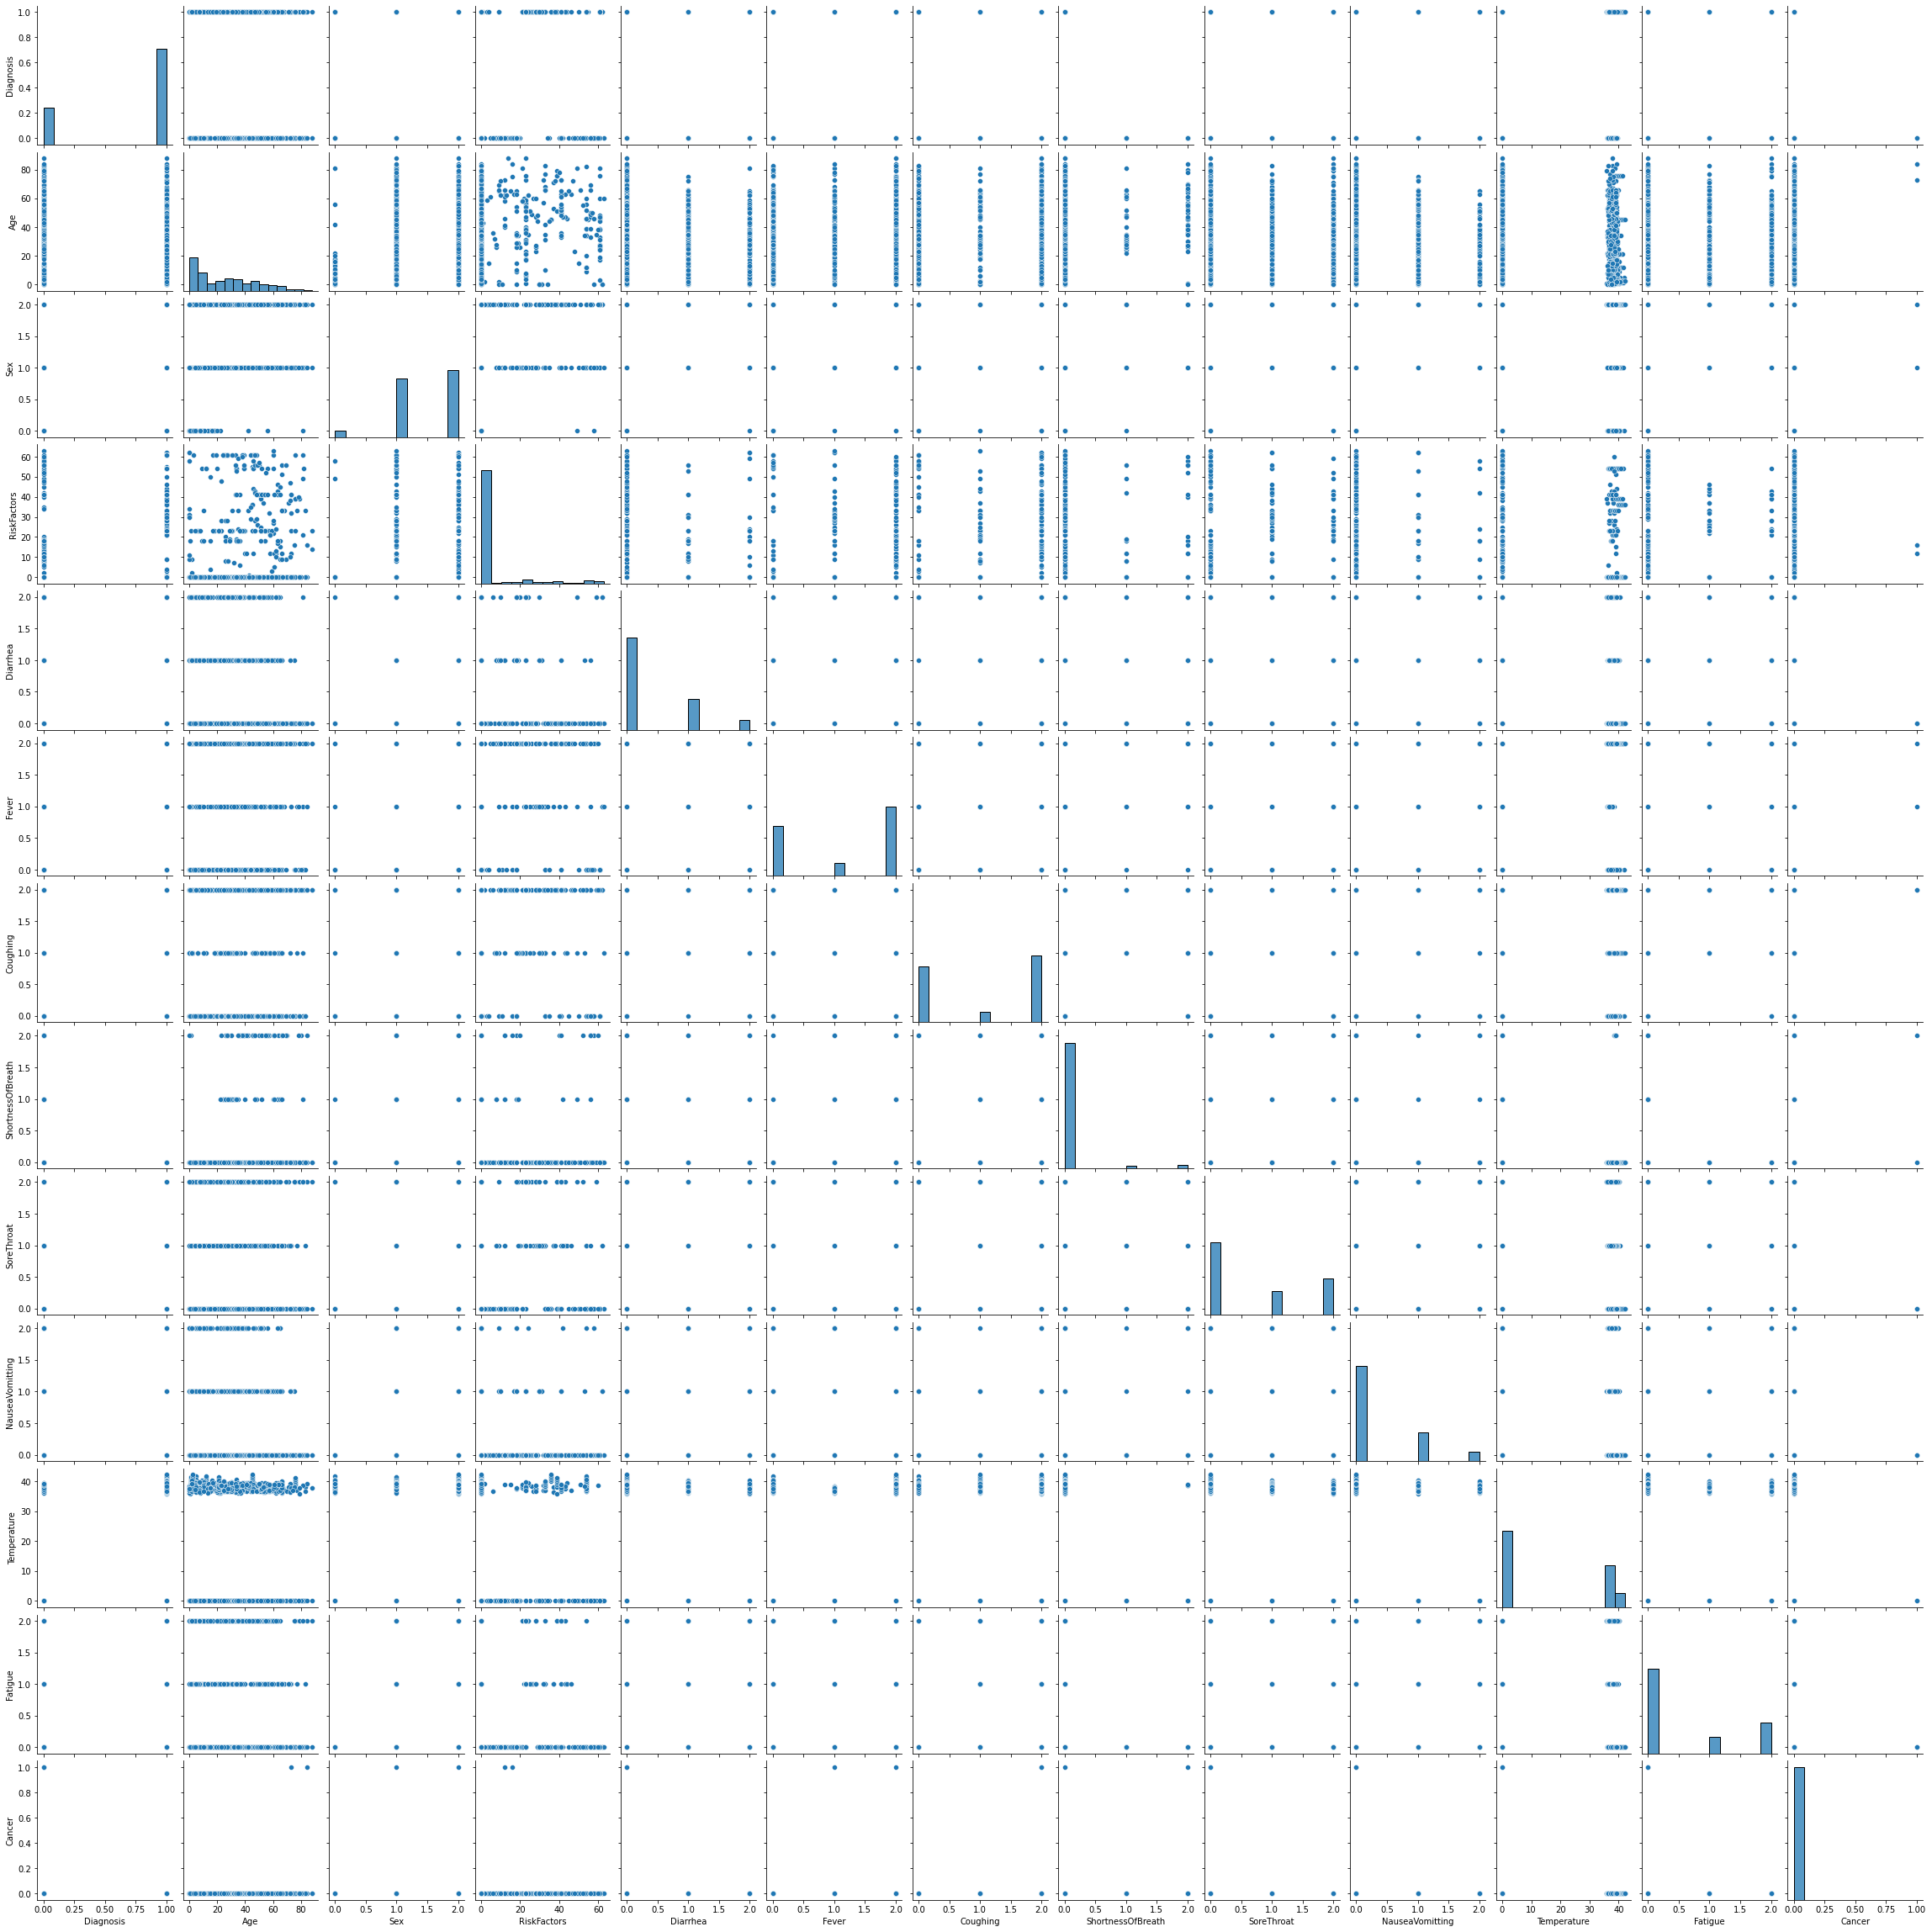

In [10]:
sns.pairplot(df)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.tree import plot_tree

In [12]:
x = df.iloc[:,1:]

In [13]:
x.head()

,Age,Sex,RiskFactors,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue,Cancer
0,67.0,1,0,0,2,2,0,1,0,38.111111,1,0
1,29.0,2,0,0,0,0,0,0,0,0.000000,0,0
2,22.0,1,0,0,0,0,0,0,0,0.000000,0,0
3,20.0,1,54,0,2,2,0,1,0,36.555556,2,0
4,21.0,2,0,0,0,0,0,0,0,0.000000,0,0


In [14]:
y = df.iloc[:,0]

In [15]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: int8

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0,stratify=y)

In [27]:
x_test.shape, y_test.shape, x_train.shape, y_train.shape

((371, 12), (371,), (1113, 12), (1113,))

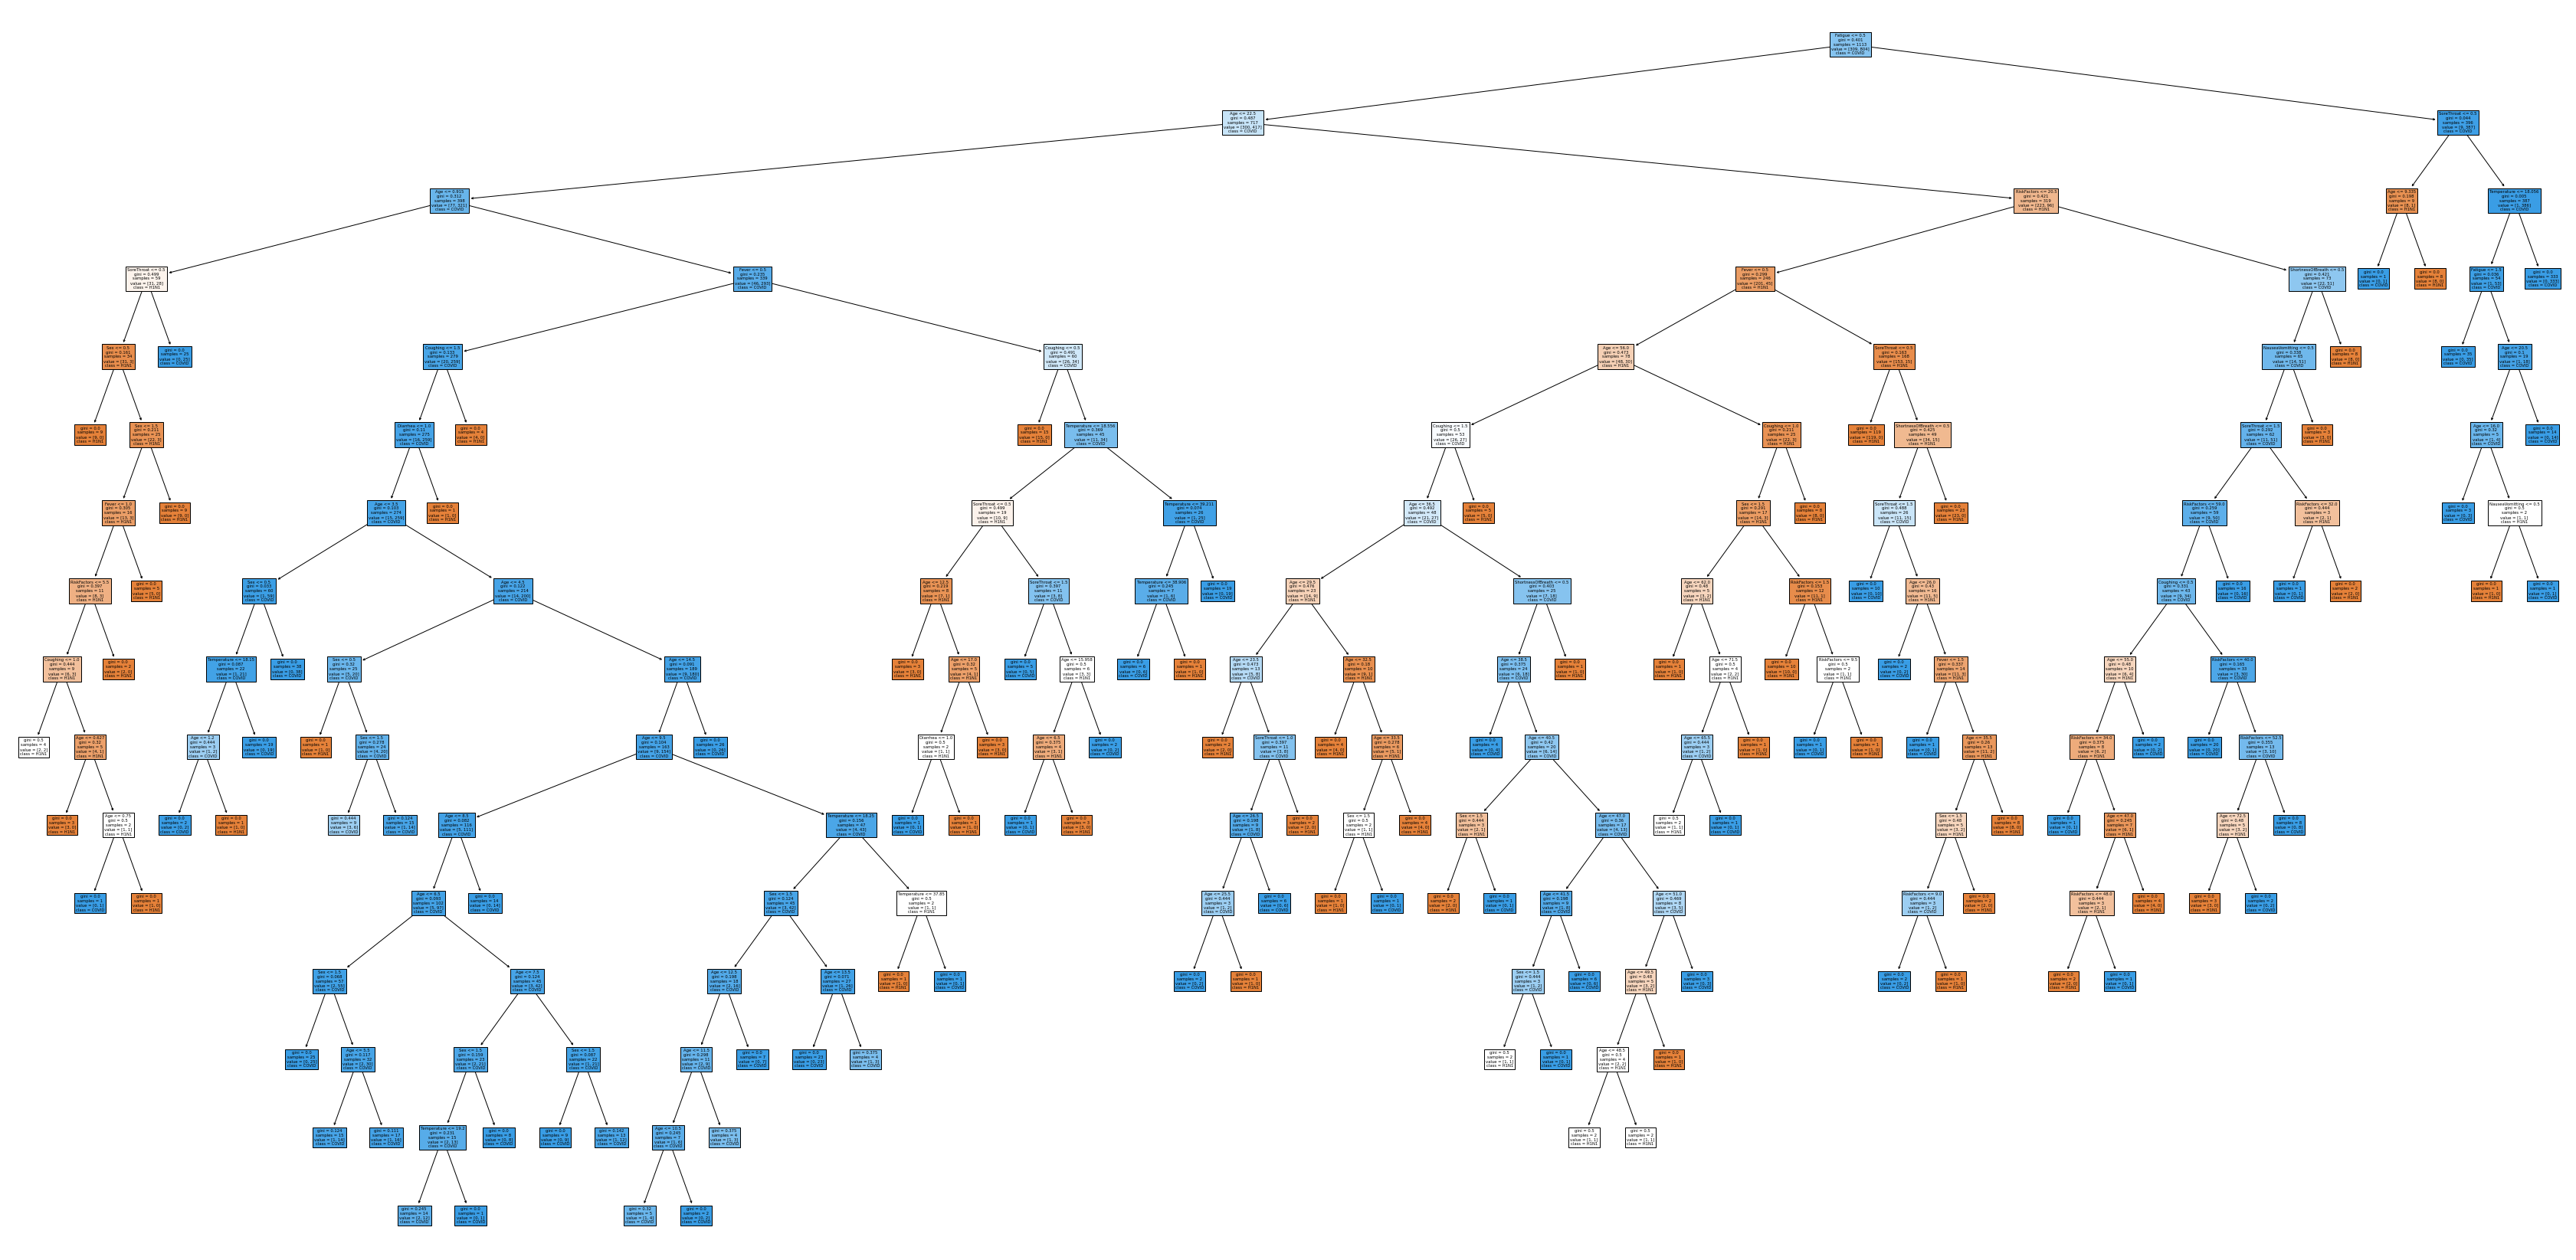

In [28]:
dt = DecisionTreeClassifier(criterion = "gini")
dt.fit(x_train, y_train)

plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns,class_names=['H1N1', "COVID"],filled=True);

In [29]:
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

print("Accuracy Score-Train: ",accuracy_score(y_test, y_test_pred))

Accuracy Score-Train:  0.9272237196765498


In [30]:
results = confusion_matrix(y_test, y_test_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)

TN  90
TP  254
FN  14
FP  13
[[ 90  13]
 [ 14 254]]


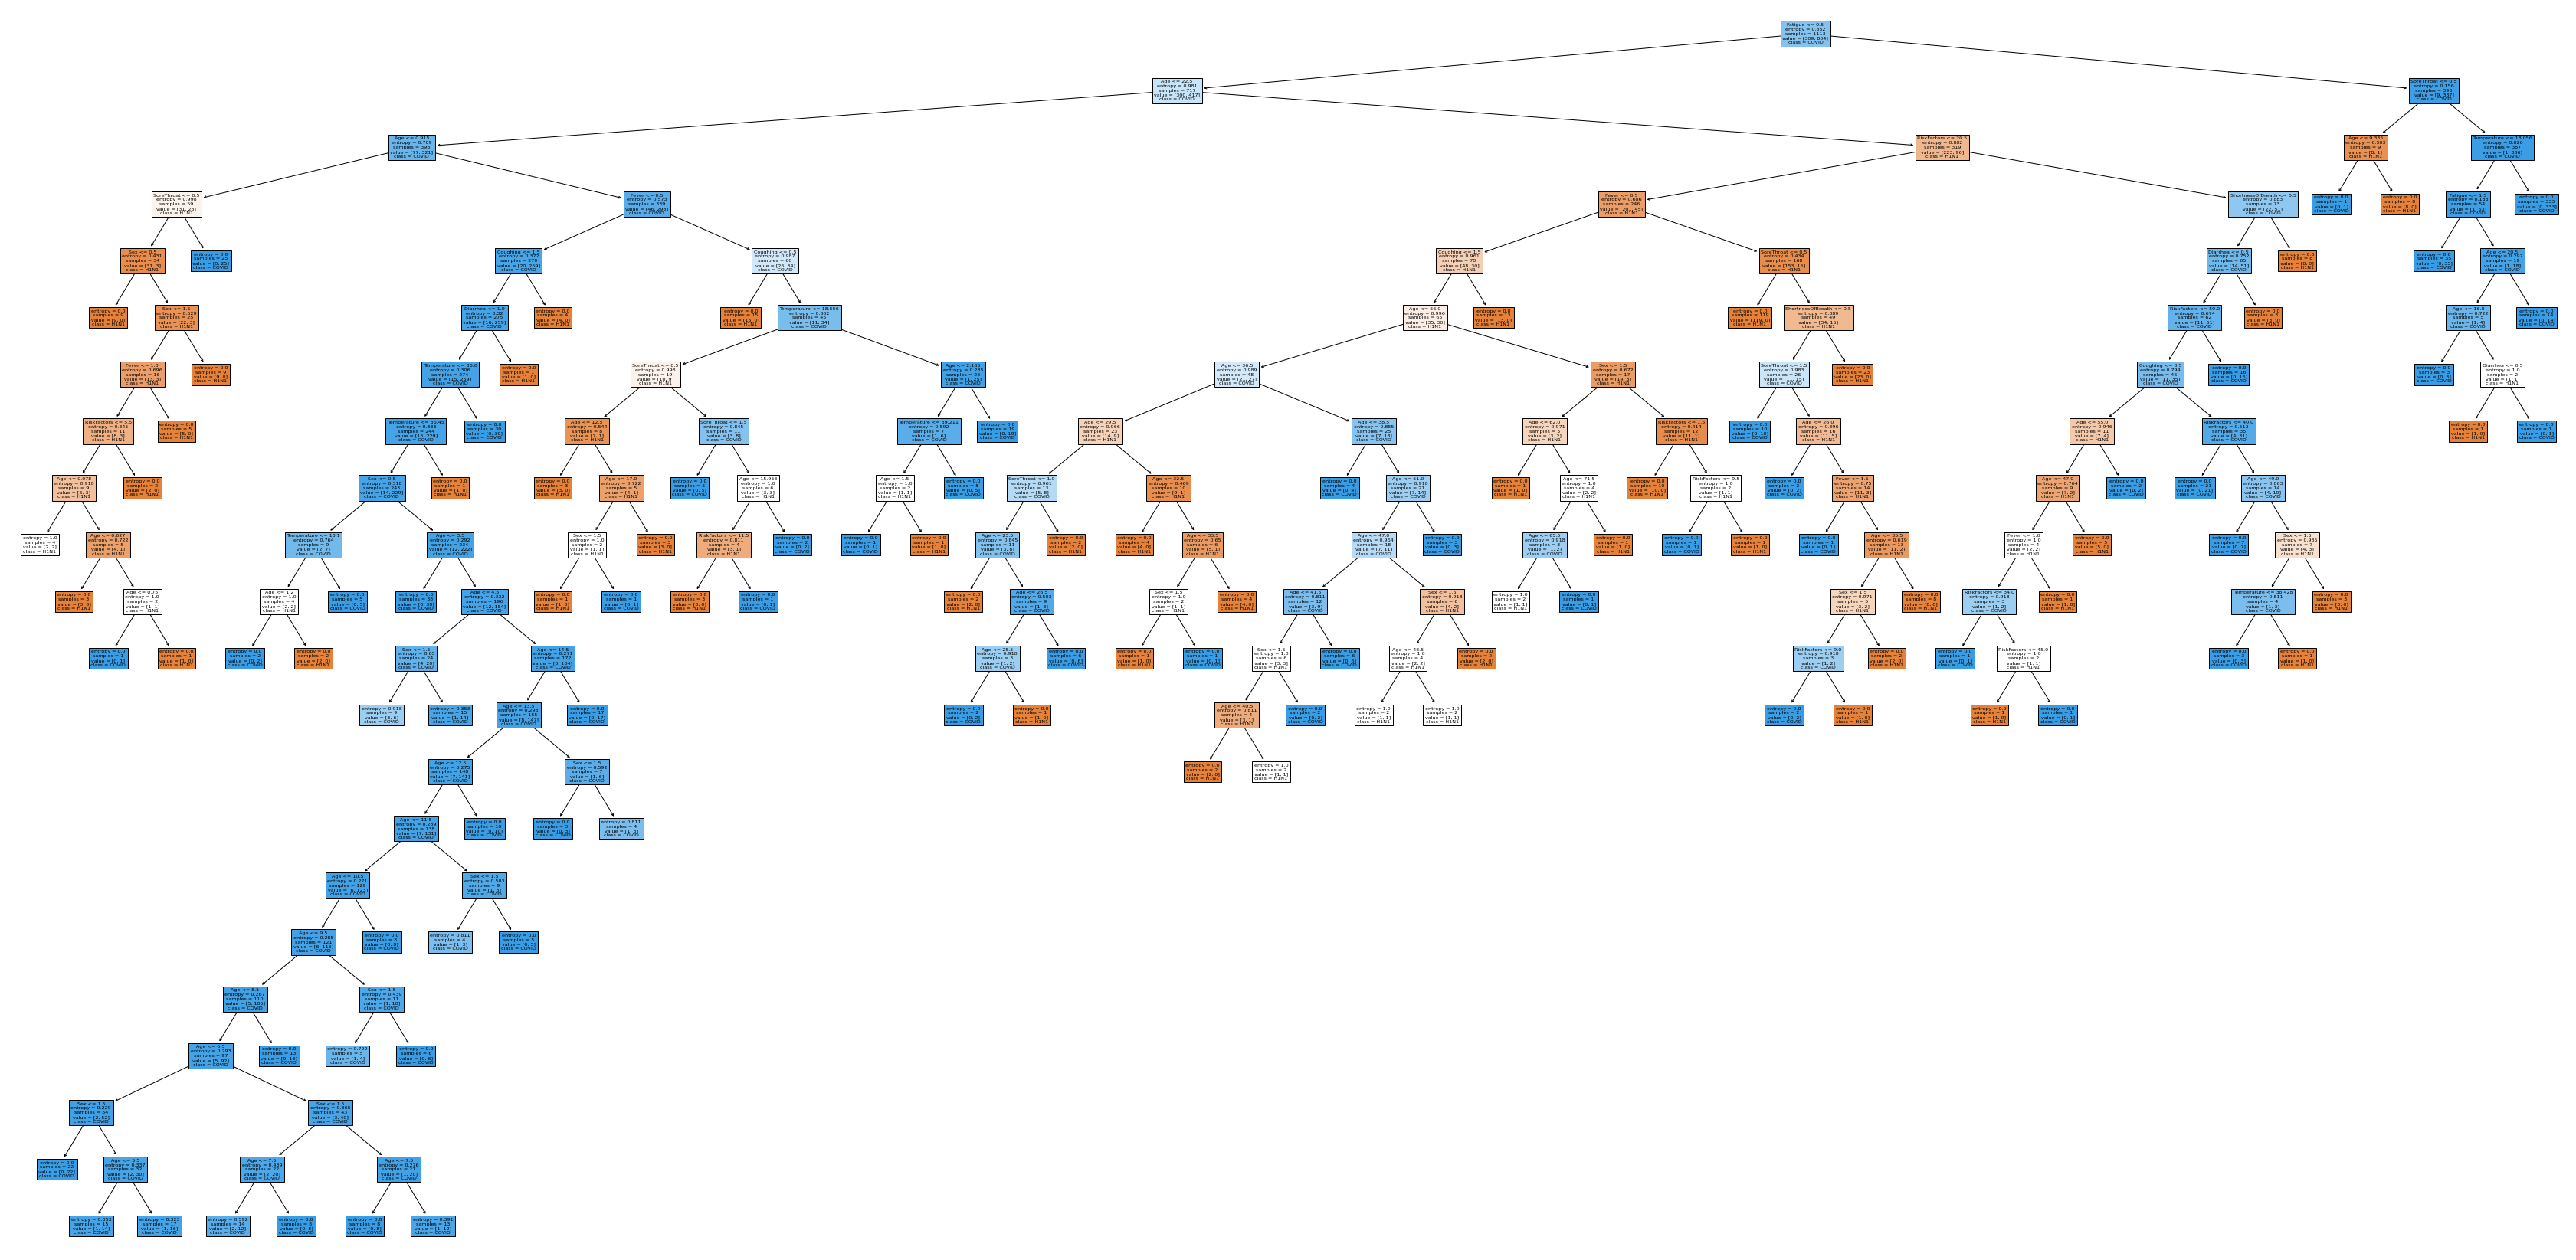

In [31]:
dt = DecisionTreeClassifier(criterion = "entropy")
dt.fit(x_train, y_train)

plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns,class_names=['H1N1', "COVID"],filled=True);

In [32]:
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

print("Accuracy Score-Train: ",accuracy_score(y_test, y_test_pred))

Accuracy Score-Train:  0.9164420485175202


In [34]:
results = confusion_matrix(y_test, y_test_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)

TN  86
TP  254
FN  14
FP  17
[[ 86  17]
 [ 14 254]]


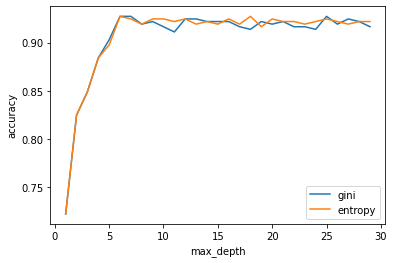

In [35]:
max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)

d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})

# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

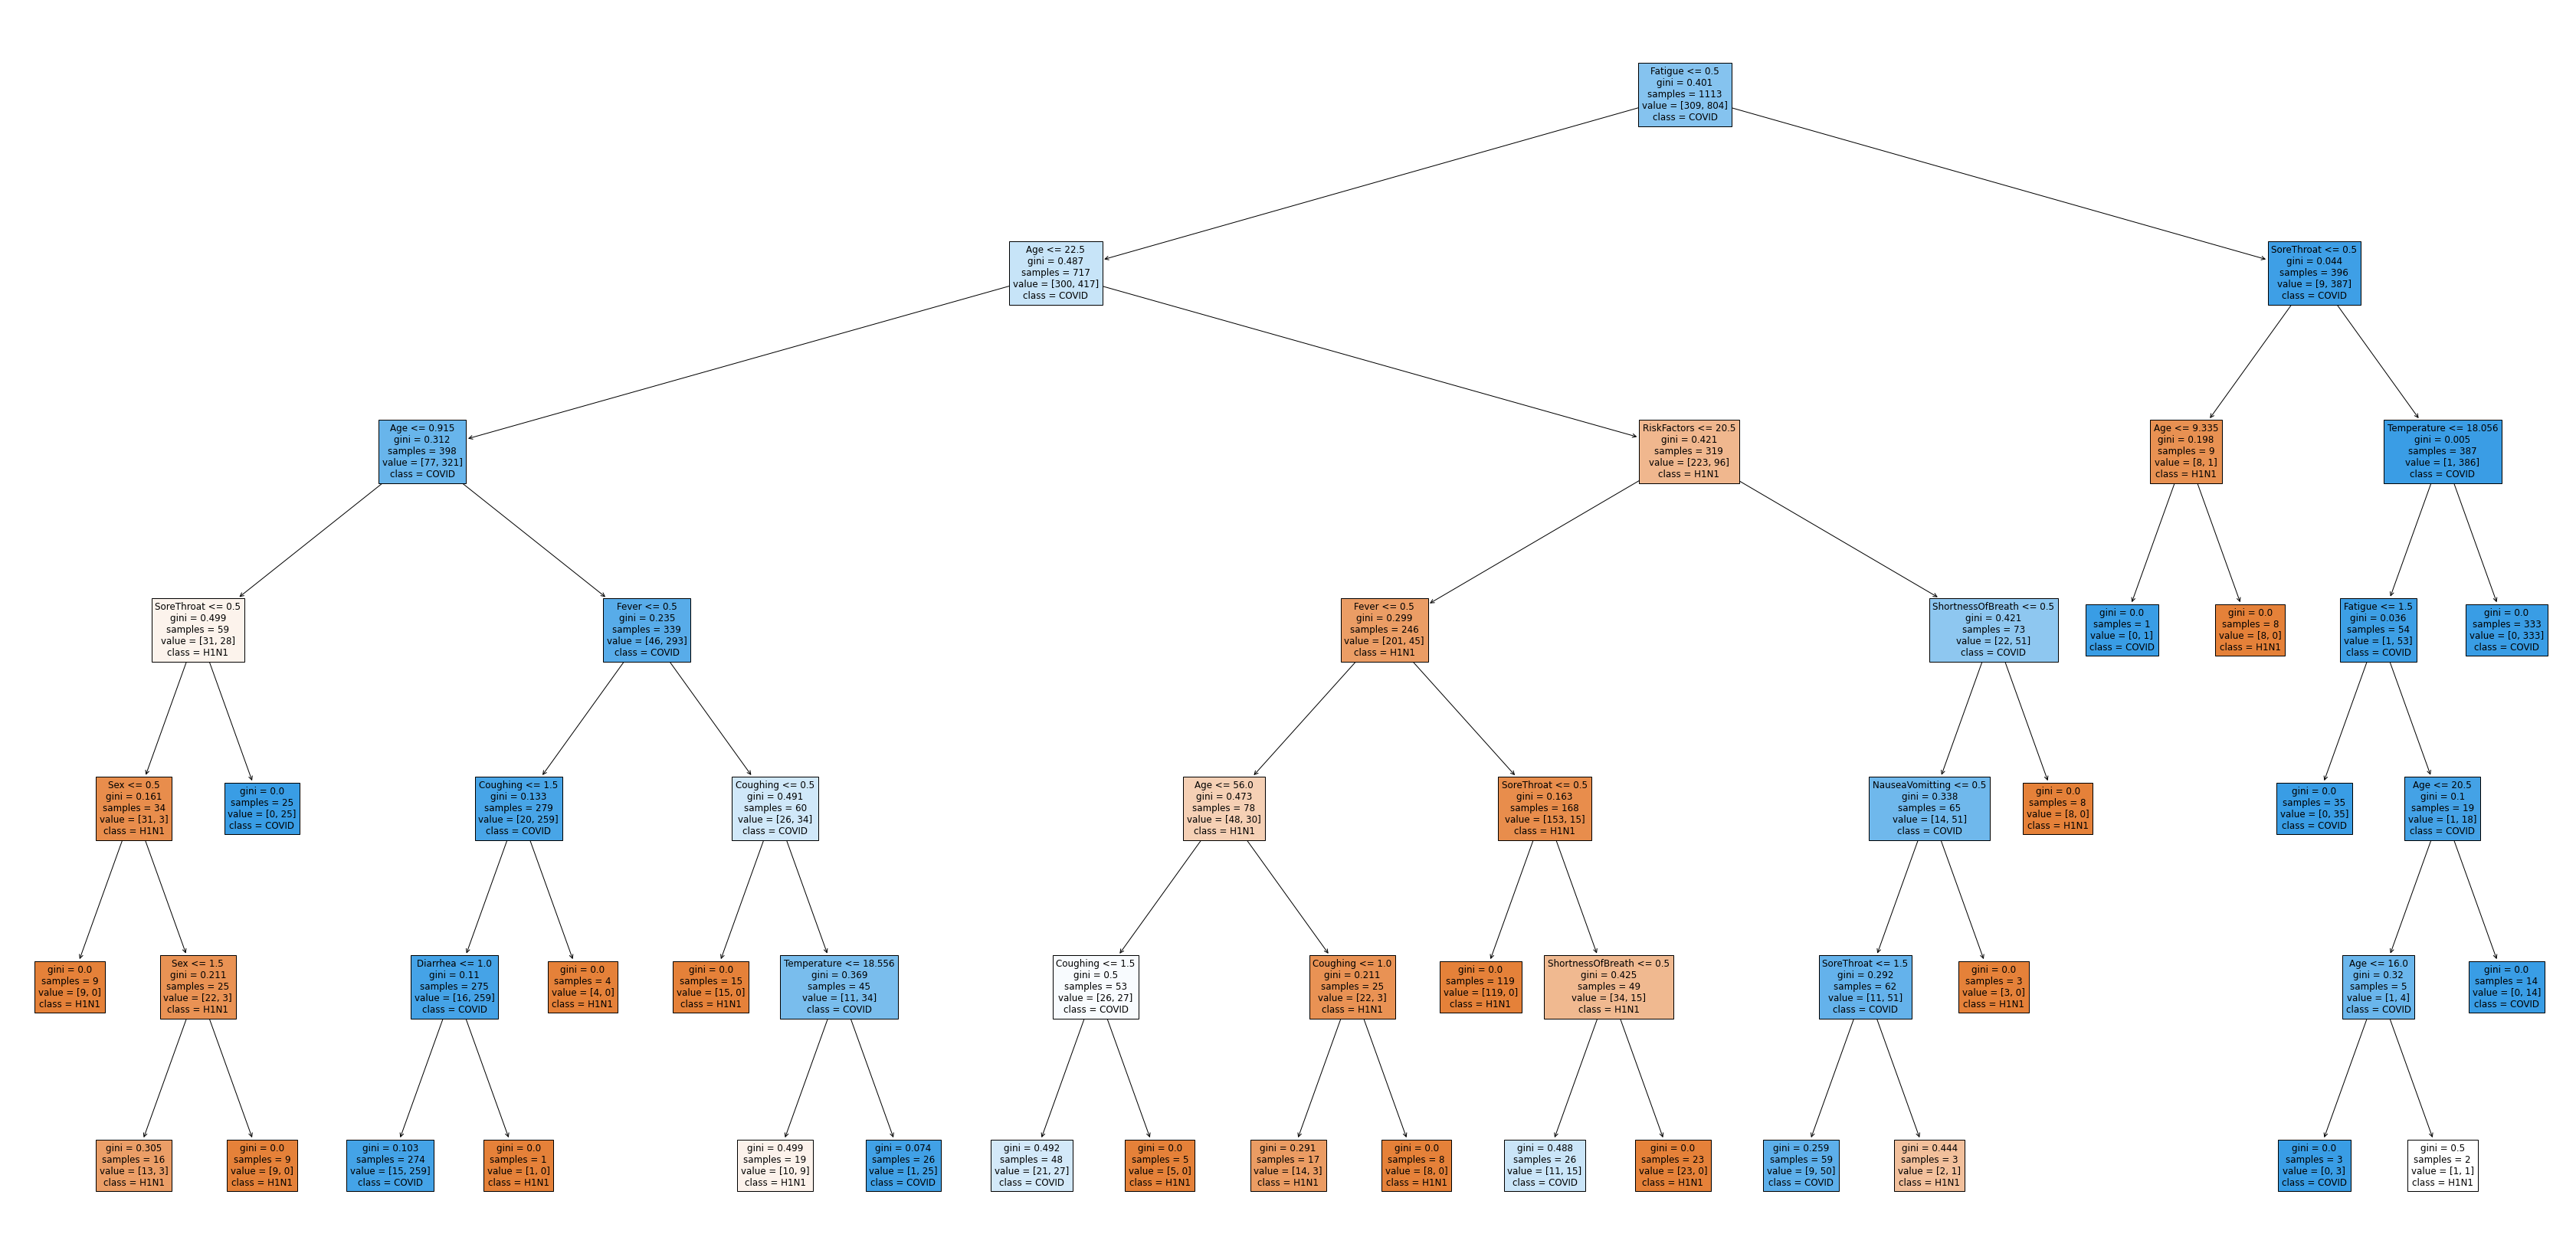

In [40]:
dt = DecisionTreeClassifier(criterion = "gini", max_depth = 6)
dt.fit(x_train, y_train)

plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns,class_names=['H1N1', "COVID"],filled=True);

In [41]:
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)
print("Accuracy Score-Train: ",accuracy_score(y_test, y_test_pred))

results = confusion_matrix(y_test, y_test_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)

Accuracy Score-Train:  0.9299191374663073
TN  83
TP  262
FN  6
FP  20
[[ 83  20]
 [  6 262]]


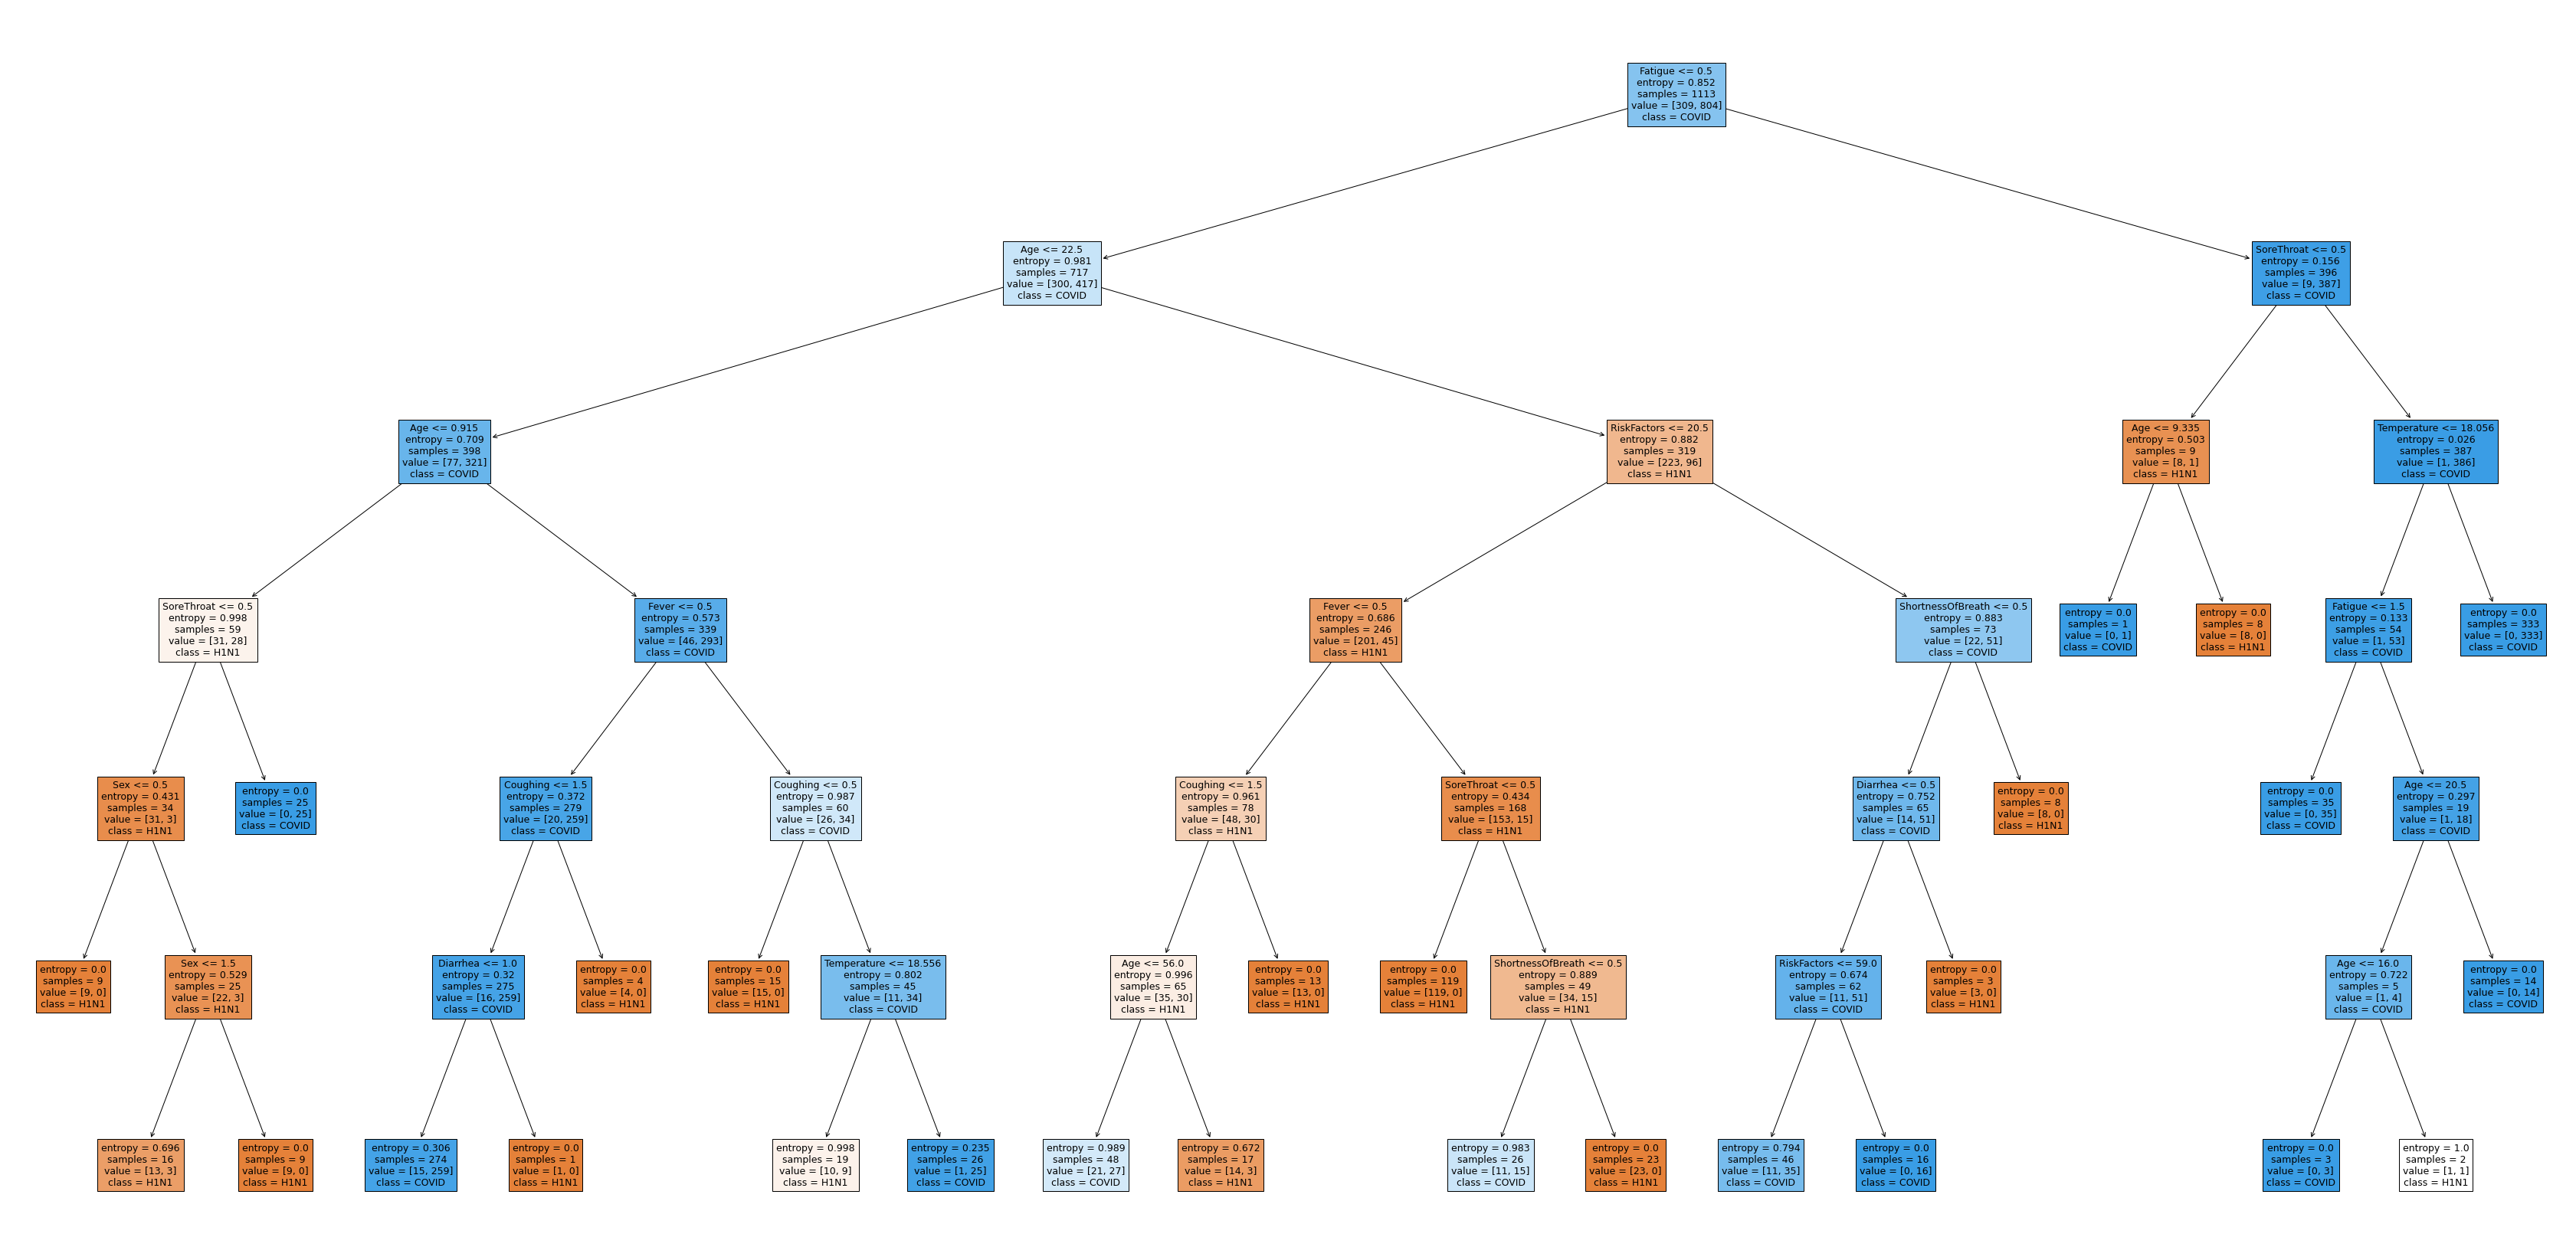

In [42]:
dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 6)
dt.fit(x_train, y_train)

plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns,class_names=['H1N1', "COVID"],filled=True);

In [43]:
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)
print("Accuracy Score-Train: ",accuracy_score(y_test, y_test_pred))

results = confusion_matrix(y_test, y_test_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)

Accuracy Score-Train:  0.9272237196765498
TN  82
TP  262
FN  6
FP  21
[[ 82  21]
 [  6 262]]


In [ ]:
path = r"C:\Users\seles\Desktop\Training Dataset.csv"
dfTrain = pd.read_csv(path)
dfTrain.head(10)

In [ ]:
dfTrain['Patient.Type'].value_counts()

In [ ]:
x_train = dfTrain.iloc[:,:-1]
x_train

In [ ]:
y_train = dfTrain.iloc[:,-1]
y_train

In [ ]:
path = r"C:\Users\seles\Desktop\Testing Dataset.csv"
dfTest = pd.read_csv(path)
dfTest.head(10)


In [ ]:
dfTest['Patient.Type'].value_counts()

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.countplot(dfTest['Patient.Type'], palette='OrRd')
ax.set_xticklabels(['C','CD','UC'])
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.40, p.get_height()+1))

In [ ]:
x_test = dfTest.iloc[:,:-1]
x_test

In [ ]:
y_test = dfTest.iloc[:,-1]
y_test

In [ ]:
x_test.shape, y_test.shape, x_train.shape, y_train.shape

In [ ]:
dt = DecisionTreeClassifier(criterion="gini")
dt.fit(x_train, y_train)
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

plt.figure(figsize=(20,5))
plot_tree(dt, feature_names = x.columns,class_names=['C','CD','UC'],filled=True);

In [ ]:
print("Accuracy Score-Train: ",accuracy_score(y_train, y_train_pred))

In [ ]:
print("Accuracy Score-Train: ",accuracy_score(y_test, y_test_pred))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_test_pred,labels=['C','CD','UC'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['C','CD','UC'],
                      title='Confusion matrix')

In [ ]:
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train, y_train)
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

plt.figure(figsize=(20,5))
plot_tree(dt, feature_names = x.columns,class_names=['C','CD','UC'],filled=True);

In [ ]:
print("Accuracy Score-Train: ",accuracy_score(y_train, y_train_pred))

In [ ]:
print("Accuracy Score-Train: ",accuracy_score(y_test, y_test_pred))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_test_pred,labels=['C','CD','UC'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['C','CD','UC'],
                      title='Confusion matrix')

Pruned Trees

In [ ]:
dt = DecisionTreeClassifier(criterion="gini",max_depth=1)
dt.fit(x_train, y_train)

plt.figure(figsize=(20,5))
plot_tree(dt, feature_names = x.columns,class_names=['C','CD','UC'],filled=True);

Evaluating model performance

In [ ]:
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

In [ ]:
print("Accuracy Score-Train: ",accuracy_score(y_train, y_train_pred))

In [ ]:
print("Accuracy Score-Train: ",accuracy_score(y_test, y_test_pred))

In [ ]:
results = confusion_matrix(y_test, y_test_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_test_pred,labels=['C','CD','UC'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['C','CD','UC'],
                      title='Confusion matrix')

In [ ]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 2, max_leaf_nodes = 3)
dt.fit(x_train, y_train)

plt.figure(figsize=(20,5))
plot_tree(dt, feature_names = x.columns,class_names=['C','CD','UC'],filled=True);

In [ ]:
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

In [ ]:
print("Accuracy Score-Train: ",accuracy_score(y_test, y_test_pred))

In [ ]:
results = confusion_matrix(y_test, y_test_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_test_pred,labels=['C','CD','UC'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['C','CD','UC'],
                      title='Confusion matrix')

In [ ]:
max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)

d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})

# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()